# Introduction

We'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. 

# Import Statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [ ]:
colors = pd.read_csv('colors.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
f'The total number of unique color is: {colors.name.nunique()}'

'The total number of unique color is: 135'

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
print(f'The toal number of transparent and opaque color is:\n\n') 
colors.is_trans.value_counts()

The toal number of transparent and opaque color is:




f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.


<img src=' https://i.imgur.com/aKcwkSx.png' />

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src=' https://i.imgur.com/whB1olq.png' />

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Take a look at the first and last couple of rows of the sets data. 

In [ ]:
# first couple of obsersavtion
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
# last couple of observations
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
sets.loc[sets.year.idxmin()]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

The first LEGO was released in the yar `1949`. Now we will determine the names of the set released in that year.  

In [ ]:
sets_1949 = sets[sets.year==1949]
sets_1949

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
print('The names of the ser released in the year 1949 are:\n')
sets_1949.name

The names of the ser released in the year 1949 are:



9521           Extra-Large Gift Set (ABB)
9534                 Large Gift Set (ABB)
9539                Medium Gift Set (ABB)
9544                Small Brick Set (ABB)
9545    Small Doors and Windows Set (ABB)
Name: name, dtype: object

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
f'LEGO sold {sets_1949.name.nunique()} different set in their first year'

'LEGO sold 5 different set in their first year'

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
print(f'The top 5 LEGO sets with the most number of parts are shown in the dataframe below:\n\n')
sets.sort_values('num_parts', ascending=False)[:5]

The top 5 LEGO sets with the most number of parts are shown in the dataframe below:




,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


The largest LEGO set ever produced has around 10,000 pieces! Apparently, only two of these boxes were ever produced, so if you wanted to get your hands on a ridiculously large LEGO set, you'll have to settle for the 7,541 piece Millennium Falcon.

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [ ]:
sets_by_year = sets.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [ ]:
print('The number of sets released year-on-year is:\n')
sets_by_year.set_num

The nymber of sets released year-on-year is:



year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2019 the company had grown spectacularly, releasing 840 sets in that year alone!

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

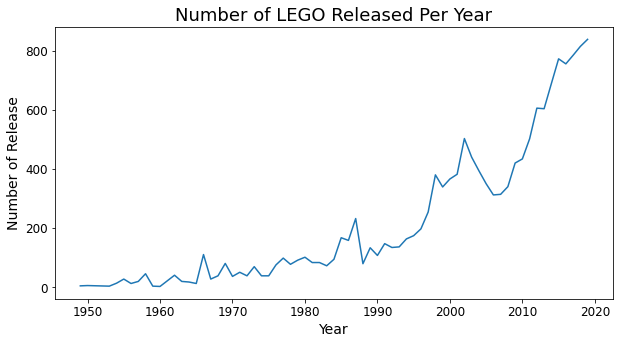

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sets_by_year.set_num[:-2])
plt.title('Number of LEGO Released Per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Release', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
theme_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
theme_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
# rename the theme_id name of the new theme_by_year
theme_by_year.rename(columns={'theme_id': 'yearly_unique_theme_id'}, inplace=True)

In [ ]:
theme_by_year.head(2)

,yearly_unique_theme_id
year,
1949,2
1950,1


In [ ]:
# EXTRA CODE:
# to see each theme_id categories per year
sets.groupby(['year', 'theme_id']).count()['set_num'].head(10)

year  theme_id
1949  365          3
      371          2
1950  371          6
1953  366          1
      371          3
1954  371         12
      372          2
1955  370          1
      371         20
      372          6
Name: set_num, dtype: int64

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

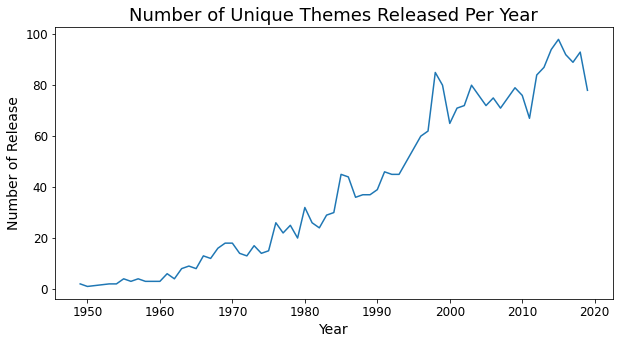

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(theme_by_year.yearly_unique_theme_id[:-2])
plt.title('Number of Unique Themes Released Per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Release', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Line Charts with Two Seperate Axes

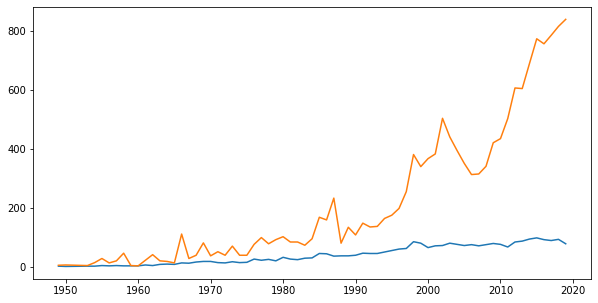

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(theme_by_year.yearly_unique_theme_id[:-2])
plt.plot(sets_by_year.set_num[:-2])

Well, that's not very informative! 

The problem is that the "number of themes" and the "number of sets" have very different scales. 

The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

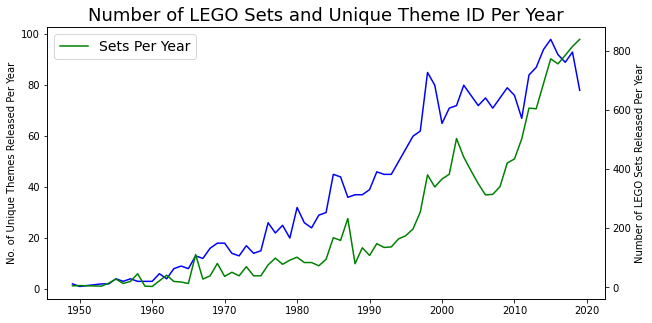

In [ ]:
plt.figure(figsize=(10, 5))
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()  # ax2 will share common x-axis with ax1 
ax1.plot(theme_by_year.yearly_unique_theme_id[:-2], c='blue', label='Theme ID Per Year')
ax2.plot(sets_by_year.set_num[:-2], c='green', label='Sets Per Year')
plt.title('Number of LEGO Sets and Unique Theme ID Per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
# label for each axis
ax1.set_ylabel('No. of Unique Themes Released Per Year')
ax2.set_ylabel('Number of LEGO Sets Released Per Year')
plt.legend(fontsize=14)
plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean}) 
# rename the column
parts_per_set.rename(columns={'num_parts': 'avg_num_of_parts'}, inplace=True)
# print the first 5 information
parts_per_set.head()

,avg_num_of_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

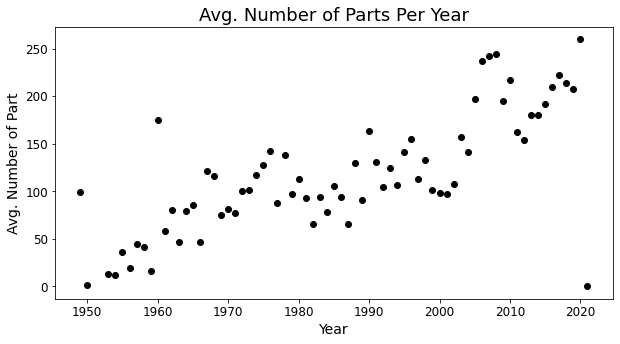

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(parts_per_set.index, parts_per_set.avg_num_of_parts, c='black')
plt.title('Avg. Number of Parts Per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg. Number of Part', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

There is an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [ ]:
sets_theme_count = sets.theme_id.value_counts()
sets_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

We can see that the theme with id 158 is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.

What is a database schema? A schema is just how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

The database schema: 
<img src='https://i.imgur.com/Sg4lcjx.png' />[link text](https://)

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

This means that the theme_id is the foreign key inside the sets.csv. Many different sets can be part of the same theme. But inside the themes.csv, each theme_id, which is just called id is unique. This uniqueness makes the id column the primary key inside the themes.csv. To see this in action, explore the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes.name.value_counts()

Supplemental    15
Airport          9
Castle           8
Traffic          7
Construction     7
                ..
Golden Land      1
Fairy-Tale       1
Avatar           1
Atlantis         1
LEGO Art         1
Name: name, Length: 422, dtype: int64

The theme names are not unique. From the results above, we see that is different ids correspond to the theme name 'Supplemental which is the highest.

In [ ]:
# a table of 'Traffic' theme: there are 7 of them
themes[themes.name=='Traffic']

,id,name,parent_id
14,15,Traffic,5.0
29,30,Traffic,23.0
37,39,Traffic,38.0
59,63,Traffic,52.0
81,85,Traffic,67.0
99,103,Traffic,94.0
308,378,Traffic,373.0


Why would Traffic have so many different themes? We can check which products corresponded to those themes in the sets.csv:

In [ ]:
# sets with theme_id of 15
sets[sets.theme_id==15]

,set_num,name,year,theme_id,num_parts
5438,42031-1,Cherry Picker,2015,15,155
5490,42078-1,Mack Anthem,2018,15,2595
5510,42098-1,Car Transporter,2019,15,2493
5525,42110-1,Land Rover Defender,2019,15,2573
12364,8258-1,Crane Truck,2009,15,1877
12369,8263-1,Snow Groomer,2009,15,590
12378,8273-1,Off Road Truck,2007,15,805
12389,8285-1,Tow Truck,2006,15,1879
12390,8286-1,3 In 1 Car / Amphipower,1996,15,732
12502,8433-1,Cool Movers,2004,15,215


In [ ]:
# what is we check for sets with theme_id of 30
sets[sets.theme_id==30]

,set_num,name,year,theme_id,num_parts
2939,30183-1,Little Car,2013,30,50
3035,30283-1,Off-Road,2015,30,43
11825,7803-1,Jeep,2009,30,38


Currently, our theme_ids and our number of sets per theme live inside a Series called set_theme_count.

To make sure we have a column with the name id, I'll convert this Pandas Series into a Pandas DataFrame.

In [ ]:
sets_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [ ]:
sets_theme_count = pd.DataFrame({'id':sets_theme_count.index, 
                                 'set_counts':sets_theme_count.values})
sets_theme_count.head()

,id,set_counts
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
# joining the sets and themes data based on their respective primary andforeign key
merged_data = pd.merge(sets_theme_count, themes, on='id')

In [ ]:
merged_data.head()

,id,set_counts,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


Star Wars is indeed the theme with the most LEGO sets.

### The Plot of The Top 10 Themes With The Highest Sets

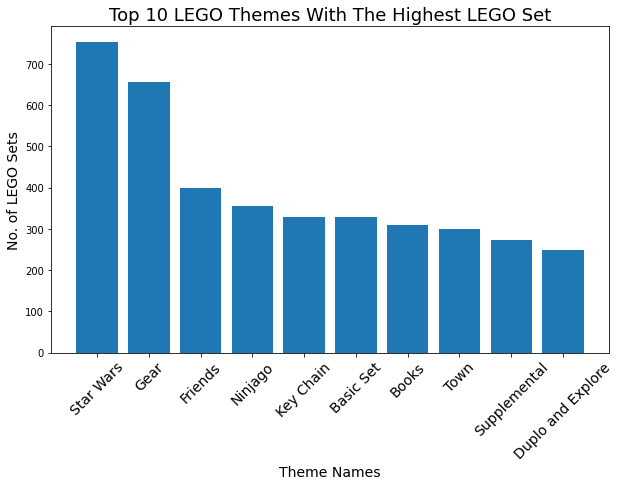

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data.name[:10], merged_data.set_counts[:10])
plt.title('Top 10 LEGO Themes With The Highest LEGO Set', fontsize=18)
plt.xlabel('Theme Names', fontsize=14)
plt.ylabel('No. of LEGO Sets', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.show()

From the bar chart shown above, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently. Has LEGO strayed from its core business or is it successfully diversifying? That we can't answer from our dataset. I'll leave that one up to a business school case study to decide. 